# 計算物理３ 自由課題 : BlackHoleCamera

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

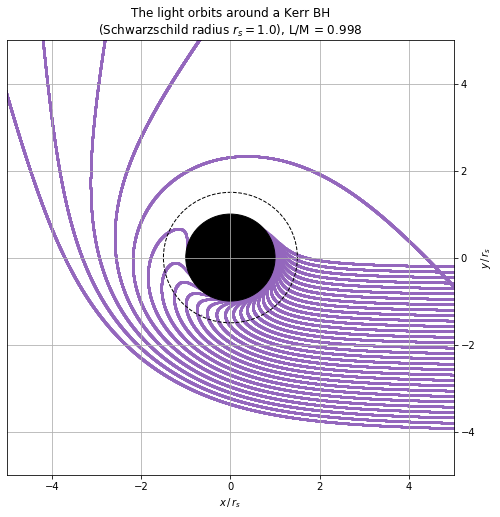

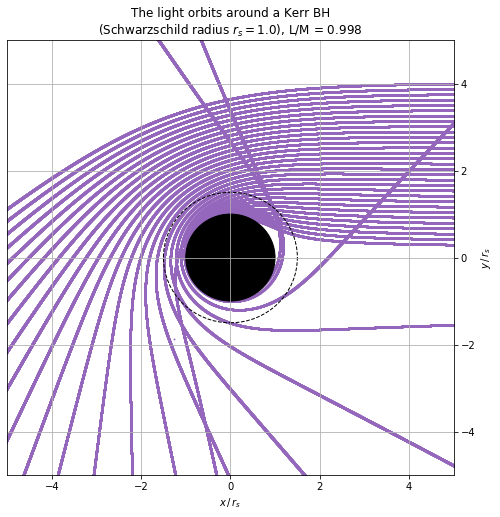

In [6]:
def bh_plt(filename, a):
    df_data = pd.read_csv(filename, names=("r","theta","phi"))
    df_data = pd.DataFrame(df_data.query("theta > 1.56 and theta < 1.58"))
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)

    c1 = pat.Circle(xy=(0, 0), radius=1.0, fc='black', ec='black')
    c2 = pat.Circle(xy=(0, 0), radius=1.5, ec='black', fill=False, linestyle='dashed')
    ax.add_patch(c1)
    ax.add_patch(c2)

    r = np.sqrt(df_data['r']*df_data['r'] + a*a)
    ax.scatter(x =0.5* r * np.sin(df_data['theta']) * np.cos(df_data['phi']),
                y =0.5 * r * np.sin(df_data['theta']) * np.sin(df_data['phi']), 
                s = 0.8,
                c = color_cycle[4])

    ax.set_title('The light orbits around a Kerr BH\n'\
                     '(Schwarzschild radius $r_s = 1.0$), L/M = 0.998')
    ax.set_xlabel('$x \, / \, r_s$')
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax.set_ylabel('$y \, / \, r_s$')
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.grid(True)
    
bh_plt("../data/backup_data/output11.csv", 0.998)
bh_plt("../data/backup_data/output12.csv", 0.998)

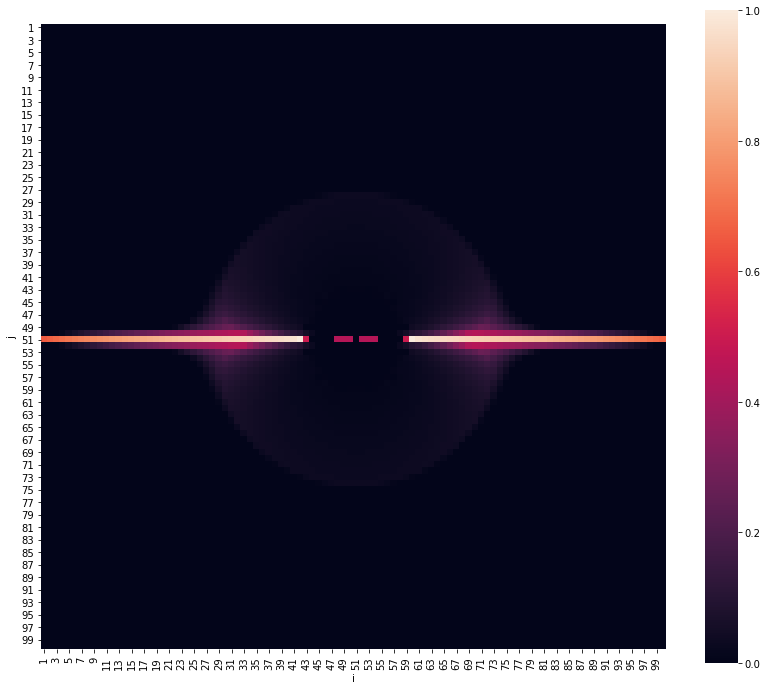

In [3]:
filename = "../data/sample2.csv"

fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111)

df = pd.read_csv(filename, names=("i", "j", "intensity"))
df["intensity"] = df["intensity"]/df["intensity"].max()
df = df.pivot(index='j', columns='i', values='intensity')

sns.heatmap(df, square=True, vmax=1, vmin=0)
plt.savefig("sample2.png", format="png", dpi=200)

In [5]:
filename = "../data/yuga.dat"

# fig = plt.figure(figsize=(14, 12))
# ax = fig.add_subplot(111)

df = pd.read_csv(filename, names=("n","theta", "intensity", "r"))
# df["intensity"] = df["intensity"]/df["intensity"].max()
# df = df.pivot(index='j', columns='i', values='intensity')

# sns.heatmap(df, square=True, vmax=1, vmin=0)
# plt.savefig("yuga.png", format="png", dpi=200)

In [46]:
df = df[::10]

In [47]:
df_tmp = pd.DataFrame([])

In [48]:
df_tmp["i"] = df["r"]*np.cos(df["theta"])
df_tmp["j"] = df["r"]*np.sin(df["theta"])
df_tmp["intensity"] = df["intensity"]

In [61]:
df_tmp = df_tmp[:150000]

In [ ]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111)

df_tmp["intensity_eff"] = df_tmp["intensity"]/df_tmp["intensity"].max()
df_tmp = df_tmp.pivot(index='i', columns='j', values='intensity')

sns.heatmap(df, square=True, vmax=1, vmin=0)
plt.savefig("yuga.png", format="png", dpi=200)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
